# Fig16. Geographical distribution of funding across the 17 Spanish regions, divided according to the three phases. 

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl


plt.style.use('seaborn-muted')


def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.fillna(0)
    
    return filtered_df

#### Define projects data path

In [2]:
file_path = "data/mapeo_proyectos.csv"

#### Define function to clean projects data

In [3]:
def prepare_data(data):
    data.drop_duplicates(subset ="ID proyecto", keep = "first", inplace = True)
    data["Financiación"] = pd.to_numeric(data["Financiación"], errors='coerce')
    data["Temporalización (inicio)"] = pd.to_numeric(data["Temporalización (inicio)"], downcast='integer')
    data = data[data["CCAA"] != 0]
    data = data[data["Financiación"] != 0]
    mini = data[["ID proyecto","Financiación", "Temporalización (inicio)", "CCAA"]] 
    top_df = mini.groupby("CCAA", sort=False).agg({'Financiación': 'sum'}).reset_index()
    top_df = top_df.sort_values(by ='Financiación', ascending=False)
    top_order = top_df["CCAA"].tolist()
    grp = mini.groupby(['CCAA', 
        pd.cut(mini["Temporalización (inicio)"], 
               np.arange(mini['Temporalización (inicio)'].min()-1, 
                         mini['Temporalización (inicio)'].min()+40, 11))]).agg({'Financiación':'sum'})
    grp = grp.fillna(0)
    # grp.columns = grp.columns.droplevel(1)
    # grp.columns = ["count","pcts","pcts_sum"]
    result = grp.reindex(top_order, level="CCAA").unstack()
    result.columns = result.columns.droplevel(1)
    result.columns = [f"{mini['Temporalización (inicio)'].min()}-{mini['Temporalización (inicio)'].min()+10}",
                     f"{mini['Temporalización (inicio)'].min()+11}-{mini['Temporalización (inicio)'].min()+21}",
                     f"{mini['Temporalización (inicio)'].min()+22}-{mini['Temporalización (inicio)'].max()}"]
    return result

#### Run program

In [4]:
proyectos = read_csv(file_path)
df2 = prepare_data(proyectos)

#### Print graph

<Figure size 432x288 with 0 Axes>

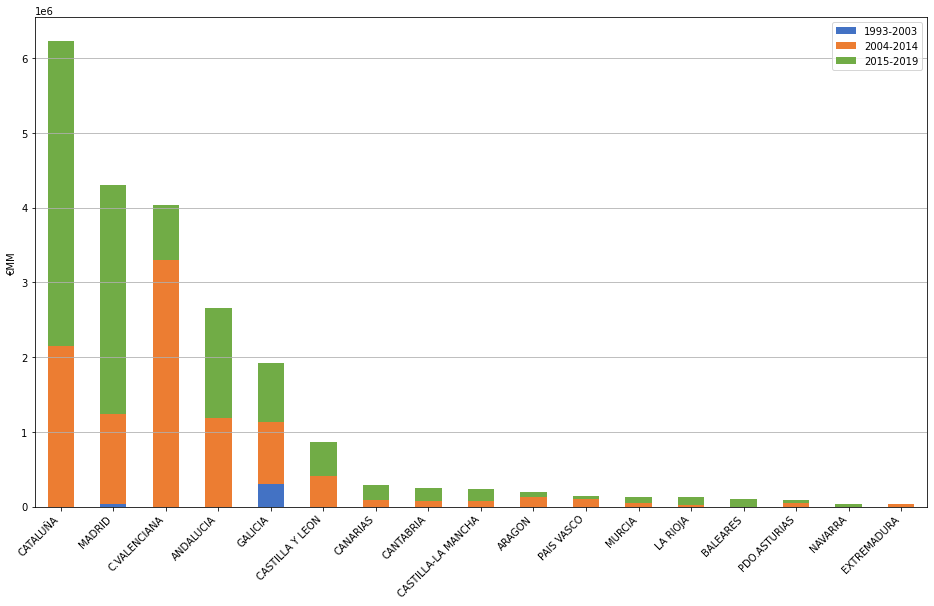

In [5]:
plt.figure()
colors = ["#4372c4", "#ec7d32", "#71ac46"]
ax1 = df2.plot(stacked=True, kind="bar", figsize=(16,9), legend=True, color=colors)
ax1.set_ylabel("€MM")
ax1.set_xlabel("")
plt.grid(axis='y')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.show()

In [6]:
df2

,1993-2003,2004-2014,2015-2019
CCAA,,,
CATALUÑA,0.0,2154717.0,4079792.0
MADRID,42489.0,1198611.0,3060860.0
C.VALENCIANA,0.0,3303510.0,728086.0
ANDALUCIA,0.0,1187065.0,1476171.0
GALICIA,299750.0,831200.0,787375.0
CASTILLA Y LEON,0.0,409974.0,454864.0
CANARIAS,0.0,92870.0,197080.0
CANTABRIA,0.0,71390.0,185130.0
CASTILLA-LA MANCHA,0.0,72600.0,159150.0
